# Analysis of Q1 on the Maven Dependency Dataset (MDG)

This document is the first chapter of a set of notebooks that accompany the paper "Breaking Bad? Semantic Versioning and Impact of Breaking Changes in Maven Central". In this chapter, we investigate Q1 and its corresponding null hypothesis.

**Q1**: How are semantic versioning principles applied in the Maven Central Repository in terms of breaking changes?

**H$_1$**: BCs are widespread without regard for semantic versioning principles.

---

## Table of Contents
<div class="toc" style="margin-top: 1em;">
    <ul class="toc-item">
        <li>
            <span><a href="#Setup" data-toc-modified-id="Setup">Setup</a></span>
        </li>
        <li>
            <span><a href="#Dataset" data-toc-modified-id="Dataset">Dataset</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset">Load Dataset</a></span>
                </li>
                <li>
                    <span><a href="#Clean-Dataset" data-toc-modified-id="Clean-Dataset">Clean Dataset</a></span>
                </li>
                <li>
                    <span><a href="#Finalize-Dataset" data-toc-modified-id="Finalize-Dataset">Finalize Dataset</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)">Exploratory Data Analysis (EDA)</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Dataset-Summary" data-toc-modified-id="Dataset-Summary">Dataset Summary</a></span>
                </li>
                <li>
                    <span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics">Descriptive Statistics</a></span>
                </li>
                <li>
                    <span><a href="#Java-Versions" data-toc-modified-id="Java-Versions">Java Versions</a></span>
                </li>
                <li>
                    <span><a href="#Semantic-Versioning-Levels" data-toc-modified-id="Semantic-Versioning-Levels">Semantic Versioning Levels</a></span>
                </li>
                <li>
                    <span><a href="#Interval-Between-Releases" data-toc-modified-id="Interval-Between-Releases">Interval Between Releases</a></span>
                </li>
                <li>
                    <span><a href="#Age" data-toc-modified-id="Age">Age</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Results" data-toc-modified-id="Results">Results</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Breaking-Upgrades" data-toc-modified-id="Breaking-Upgrades">Breaking Upgrades</a></span>
                </li>
                <li>
                    <span><a href="#Number-of-Breaking-Changes" data-toc-modified-id="Number-of-Breaking-Changes">Number of Breaking Changes</a></span>
                </li>
                <li>
                    <span><a href="#Breaking-Change-Types" data-toc-modified-id="Breaking-Change-Types">Breaking Change Types</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#EOF" data-toc-modified-id="EOF">EOF</a></span>
        </li>
    </ul>
</div>

---

## Setup

In [1]:
# Import required libraries
library(ggplot2)
library(tidyverse)
library(ggthemes)

# Set theme
theme_set(theme_stata())

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Warning message:
“package ‘tidyverse’ was built under R version 3.5.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

Warning message:
“package ‘tidyr’ was built under R version 3.5.2”
Warning message:
“package ‘purrr’ was built under R version 3.5.2”
Warning message:
“package ‘stringr’ was built under R version 3.5.2”
Warning message:
“package ‘forcats’ was built under R version 3.5.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘ggthemes’ was built under R version 3.5.2”


---

## Dataset

### Load Dataset

First, we load the `deltas.csv` dataset which contains information about breaking changes computed by Maracas on the selected upgrades of the MDG.

In [2]:
deltas <- read.csv("../code/cypher-queries/data/gen/deltas.csv", stringsAsFactors=FALSE, colClasses=c("level"="factor", "year"="factor", "java_version_v1"="factor", "java_version_v2"="factor", "expected_level"="factor"))
sprintf("Successfully loaded %d deltas", nrow(deltas))
head(deltas)

[1] "Successfully loaded 163814 deltas"

,group,artifact,v1,v2,level,language,year,age_diff,distance,clients,⋯,fieldLessAccessible_unstableAnnon,fieldMoreAccessible_unstableAnnon,constructorRemoved_unstableAnnon,constructorLessAccessible_unstableAnnon,unstableAnnons,jar_v1,jar_v2,delta,exception,t
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<fct>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,commons-lang,commons-lang,2.3,2.4,MINOR,java,2008,1,5,1672,⋯,-1,-1,-1,-1,{},-1,-1,-1,invalid-java-version,1
2,commons-lang,commons-lang,2.6,3.4,MAJOR,unknown,2016,1,24,47300,⋯,-1,-1,-1,-1,{},-1,-1,-1,jar-not-found,1
3,commons-collections,commons-collections,3.2,3.2.0,PATCH,unknown,2016,1,18,3556,⋯,-1,-1,-1,-1,{},-1,-1,-1,jar-not-found,1
4,commons-lang,commons-lang,2.1,2.2,MINOR,java,2006,1,14,1359,⋯,-1,-1,-1,-1,{},-1,-1,-1,invalid-java-version,1
5,commons-collections,commons-collections,3.0,3.1,MINOR,java,2005,1,0,153,⋯,-1,-1,-1,-1,{},-1,-1,-1,invalid-java-version,1
6,commons-lang,commons-lang,2.0,2.1,MINOR,java,2005,1,0,280,⋯,-1,-1,-1,-1,{},-1,-1,-1,invalid-java-version,1


### Clean Dataset

Here, we clean the dataset to discard the upgrades and deltas not complying with our requirements.

In [3]:
# What issues did we encounter when attempting to compute the deltas? (Java version >= 8, JAR not produced from Java code, JAR not found on Maven Central, etc.)
table(deltas$exception)


                  -1     exception-raised invalid-java-version 
              122913                  271                  852 
    invalid-language        jar-not-found 
               29190                10588 

In [4]:
# Which languages did we find?
table(deltas$language)


clojure  groovy    java  kotlin   scala unknown 
     20    1137  123828    1359   14402   23068 

In [5]:
# Discard all deltas that raised an exception
deltas <- subset(deltas, exception == -1)

# Discard all deltas for upgrades that do not contain any code
sprintf("%d deltas correspond to JARs not containing any code", nrow(subset(deltas, declarations_v1 == 0 & declarations_v2 == 0)))
deltas <- subset(deltas, declarations_v1 > 0 | declarations_v2 > 0)

# Discard all deltas where v1 was released _after_ v2
sprintf("%d where v1 was released after v2", nrow(subset(deltas, age_diff < 0)))
deltas <- subset(deltas, age_diff >= 0)

sprintf("%d remaining deltas after cleaning", nrow(deltas))

[1] "0 deltas correspond to JARs not containing any code"

[1] "2929 where v1 was released after v2"

[1] "119984 remaining deltas after cleaning"

In [6]:
# Remove cases where dates are used as versions (e.g. 20081010.0.1, 1.20081010.1, 1.0.20081010)
deltas <- deltas[grep("^[0-9]{0,7}[.][0-9]{0,7}([.][0-9]{0,7})?$", deltas$v1),]
deltas <- deltas[grep("^[0-9]{0,7}[.][0-9]{0,7}([.][0-9]{0,7})?$", deltas$v2),]

deltas <- deltas[!grepl("^2[0-9]{3}[.][0-9]{2}([.][0-9]{2})?$", deltas$v1),]
deltas <- deltas[!grepl("^[0-9]{2}[.][0-9]{2}[.]2[0-9]{3}$", deltas$v1),]
deltas <- deltas[!grepl("^[0-9]{2}[.]2[0-9]{3}$", deltas$v1),]

deltas <- deltas[!grepl("^2[0-9]{3}[.][0-9]{2}([.][0-9]{2})?$", deltas$v2),]
deltas <- deltas[!grepl("^[0-9]{2}[.][0-9]{2}[.]2[0-9]{3}$", deltas$v2),]
deltas <- deltas[!grepl("^[0-9]{2}[.]2[0-9]{3}$", deltas$v2),]

sprintf("%d deltas remaining after removing the ones with dates as versions", nrow(deltas))

[1] "119879 deltas remaining after removing the ones with dates as versions"

### Finalize Dataset

Here, we incorporate additional derived information into the dataset.

In [7]:
# Add column with all BCs excluding the ones related to: 
# - annotationDeprecatedAdded: not a BC
# - methodAddedToPublicClass: not a BC
# - classNowCheckedException: not binary incompatible
# - methodNowThrowsCheckedException: not binary incompatible
# - fieldStaticAndOverridesStatic: lack of alignment with JLS
# - superclassModifiedIncompatible: lack of alignment with JLS
# - methodIsStaticAndOverridesNotStatic: lack of alignment with JLS
# - methodAbstractAddedInSuperclass: covered by other BC
# - methodAbstractAddedInImplementedInterface: covered by other BC
# - methodLessAccessibleThanInSuperclass: covered by other BC
# - fieldLessAccessibleThanInSuperclass: covered by other BC
# - fieldRemovedInSuperclass: covered by other BC
# - methodRemovedInSuperclass: covered by other BC

deltas$bcs_clean = deltas$bcs -
    deltas$annotationDeprecatedAdded -
    deltas$methodAddedToPublicClass - 
    deltas$classNowCheckedException - 
    deltas$methodNowThrowsCheckedException -
    deltas$fieldStaticAndOverridesStatic -
    deltas$superclassModifiedIncompatible - 
    deltas$methodIsStaticAndOverridesNotStatic -
    deltas$methodAbstractAddedInSuperclass -
    deltas$methodAbstractAddedInImplementedInterface -
    deltas$methodLessAccessibleThanInSuperclass - 
    deltas$fieldLessAccessibleThanInSuperclass -
    deltas$fieldRemovedInSuperclass -
    deltas$methodRemovedInSuperclass

# Same thing for the stable part of the API
deltas$bcs_clean_stable = deltas$bcs_stable -
    deltas$annotationDeprecatedAdded_stable -
    deltas$methodAddedToPublicClass_stable - 
    deltas$classNowCheckedException_stable - 
    deltas$methodNowThrowsCheckedException_stable -
    deltas$fieldStaticAndOverridesStatic_stable -
    deltas$superclassModifiedIncompatible_stable - 
    deltas$methodIsStaticAndOverridesNotStatic_stable -
    deltas$methodAbstractAddedInSuperclass_stable -
    deltas$methodAbstractAddedInImplementedInterface_stable -
    deltas$methodLessAccessibleThanInSuperclass_stable - 
    deltas$fieldLessAccessibleThanInSuperclass_stable -
    deltas$fieldRemovedInSuperclass_stable -
    deltas$methodRemovedInSuperclass_stable

In [8]:
# Add columns with BCs ratios (i.e. BCs / V1 declarations)
deltas$bcs_ratio_clean = deltas$bcs_clean / deltas$declarations_v1
deltas$bcs_ratio_clean_stable = deltas$bcs_clean_stable / deltas$declarations_v1

In [9]:
# Assign the 'DEV' semver level to versions of the form 0.x.x
levels(deltas$level) <- c(levels(deltas$level), "DEV")
deltas[grepl("^0[.]", deltas$v1),]$level = "DEV"

nrow(subset(deltas, bcs_clean_stable == 0))

[1] 93472

---

## Exploratory Data Analysis (EDA)

### Dataset Summary

In [10]:
sprintf("Final size of the dataset: %s deltas", nrow(deltas))
summary(deltas)

[1] "Final size of the dataset: 119879 deltas"

    group             artifact              v1                 v2           
 Length:119879      Length:119879      Length:119879      Length:119879     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   level         language              year          age_diff    
 MAJOR: 2431   Length:119879      2017   :21501   Min.   : 0.00  
 MINOR:23309   Class :character   2018   :20785   1st Qu.: 4.00  
 PATCH:75282   Mode  :character   2016   :20238   Median :10.00  
 DEV  :18857                      2015   :16975   Mean   :11.73  
                                  2014   : 9229   3rd 

### Descriptive Statistics
This section presents some descriptive statistics on the dataset (number of clients, semver levels, popularity, releases, Java versions, etc.).

In [11]:
# Computes a density plot
# dataset: data frame with input data
# dim: vector with input data (column of the data frame)
# dim_label: name of the dimension 
# x_label: label of the x axis
# Returns a ggplot2 density plot
plot_dens_hist <- function(dataset, dim, dim_label, x_label, binw=30) {
    plot <- ggplot(dataset, aes(x=dim, y=..density..)) + 
        labs(title=sprintf("%s Density Histogram", dim_label),
             x=x_label,
             y="Density") +
        geom_histogram(binwidth=30) +
        geom_vline(aes(xintercept=median(dim)), 
                   linetype="dashed",
                   size=0.6)
    
    return(plot)
}

In [12]:
# Computes a density plot
# dataset: data frame with input data
# dim: vector with input data (column of the data frame)
# dim_label: name of the dimension 
# x_label: label of the x axis
# Returns a ggplot2 density plot
plot_dens_bar <- function(dataset, dim, dim_label, x_label) {
    plot <- ggplot(dataset, aes(x=dim, y=..prop.., group=1)) + 
        labs(title=sprintf("%s Density Histogram", dim_label),
             x=x_label,
             y="Density") +
        geom_bar() +
        ylim(0, 1) +
        theme_light(base_size=18)
    
    return(plot)
}

### Java Versions

Saving 7 x 7 in image



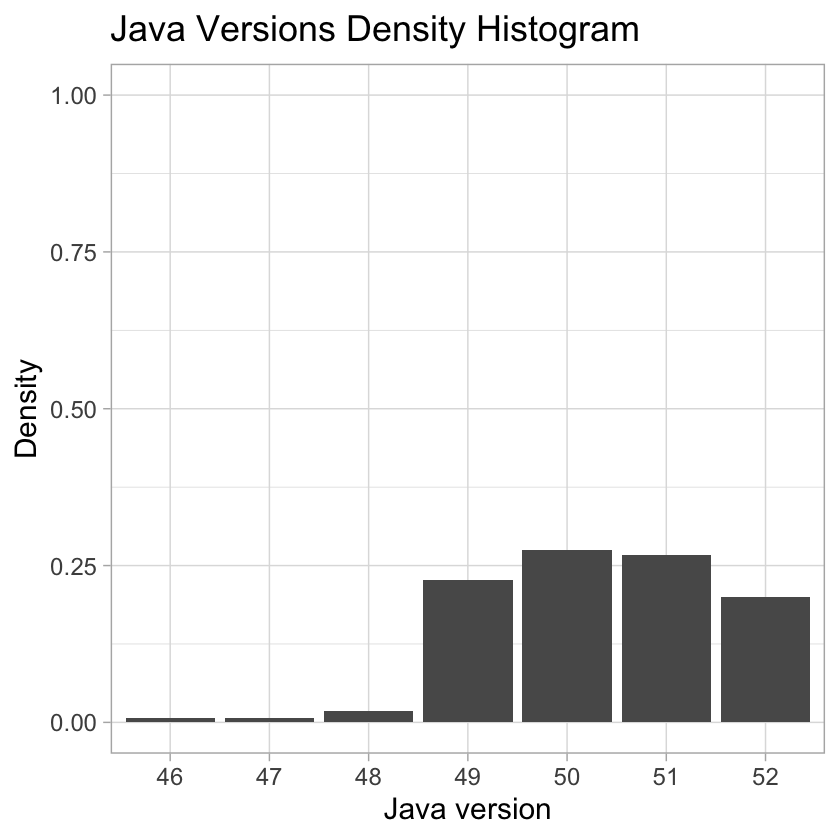

In [13]:
p <- plot_dens_bar(deltas, deltas$java_version_v1, "Java Versions", "Java version")
p
ggsave("figures/mdg-java-versions.pdf", p)

### Semantic Versioning Levels

Saving 7 x 7 in image



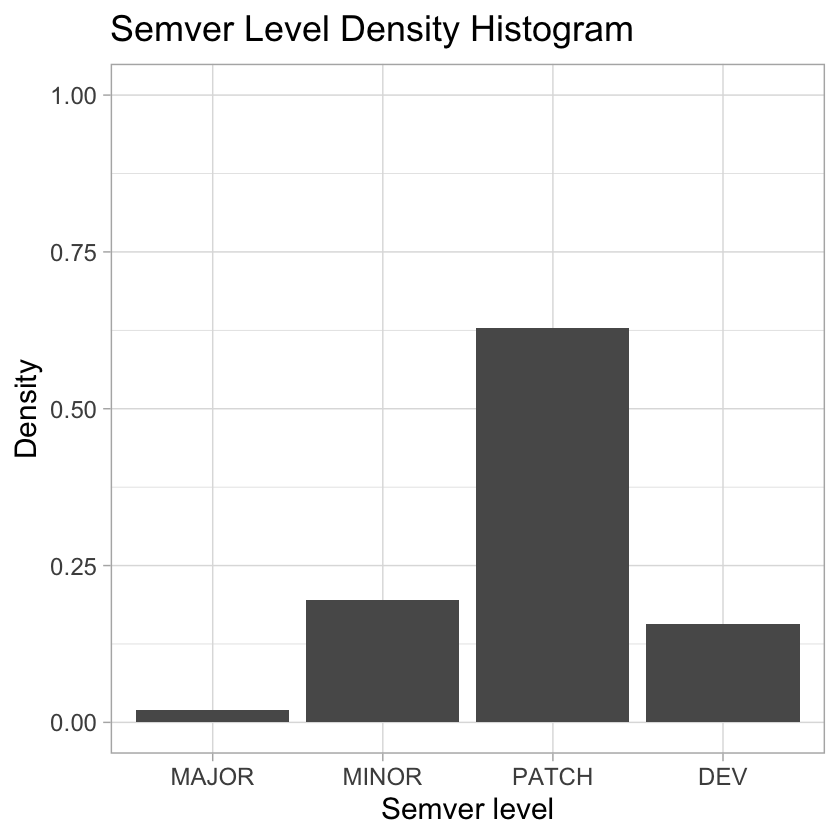

In [14]:
p <- plot_dens_bar(deltas, deltas$level, "Semver Level", "Semver level")
p
ggsave("figures/mdg-semver-levels.pdf", p)

### Interval Between Releases

The interval between releases is given in months.

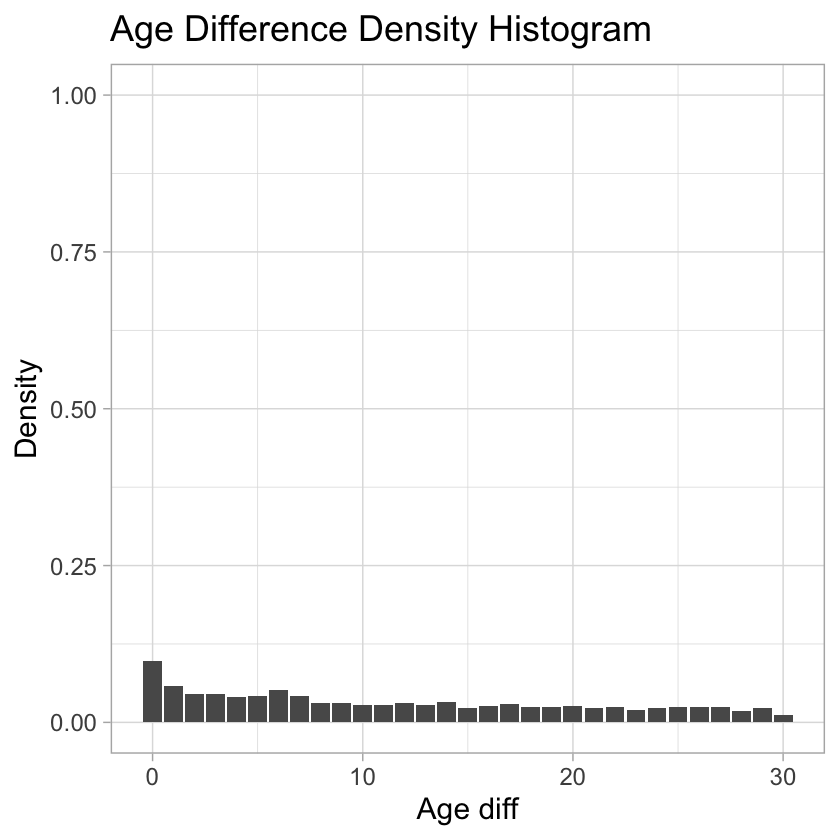

In [15]:
plot_dens_bar(deltas, deltas$age_diff, "Age Difference", "Age diff")

### Age

The age of the upgrade is relative to the first release of the library (in months).

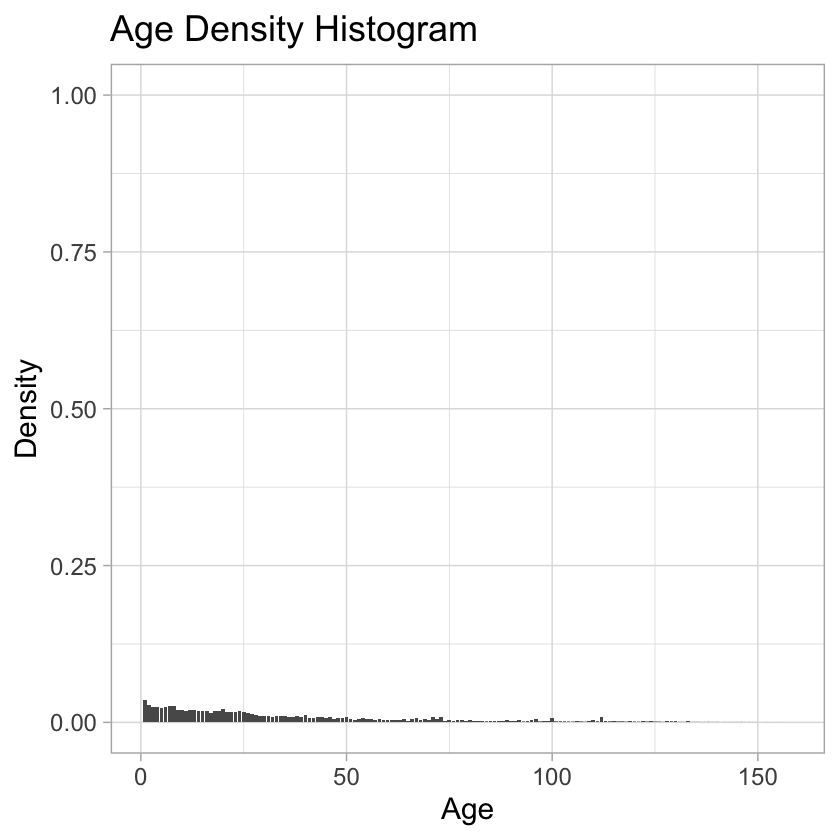

In [16]:
plot_dens_bar(deltas, deltas$age, "Age", "Age")

---

## Results

### Breaking Upgrades
First, we study the number/ratio of breaking upgrades per semantic versioning level.

In [17]:
# Get datasets per semver level
major <- subset(deltas, level == "MAJOR")
minor <- subset(deltas, level == "MINOR")
patch <- subset(deltas, level == "PATCH")
devs <- subset(deltas, level == "DEV")

In [18]:
# Computes the number of breaking upgrades
number_breaking_upgrades <- function(dataset) {
    return (nrow(subset(dataset, bcs_clean_stable > 0)))
}

# Computes the percentage of breaking upgrades
perc_breaking_upgrades <- function(dataset) {
    return (nrow(subset(dataset, bcs_clean_stable > 0)) / nrow(dataset))
}

# Computes the percentage of breaking upgrades given a list of datasets
perc_breaking_upgrades_multiple <- function(datasets) {
    total <- 0
    cases <- 0
    
    for (d in datasets) {
        cases <- cases + nrow(subset(d, bcs_clean_stable > 0))
        total <- total + nrow(d)
    }
    return (cases / total)
}

In [19]:
# Get compound datasets
nrow_nonmajor <- nrow(minor) + nrow(patch)
nrow_all <- nrow_nonmajor + nrow(major) + nrow(devs)

breaking_upgrades <- data.frame(
    level = c("MAJOR", "MINOR", "PATCH", "DEV", "NON-MAJOR", "ALL"),
    number = c(nrow(major), nrow(minor), nrow(patch), nrow(devs), nrow_nonmajor, nrow_all),
    ratio = c(nrow(major) / nrow(deltas), nrow(minor) / nrow(deltas), nrow(patch) / nrow(deltas), nrow(devs) / nrow(deltas), nrow_nonmajor / nrow(deltas), nrow_all / nrow(deltas)),
    broken = c(number_breaking_upgrades(major),
               number_breaking_upgrades(minor),
               number_breaking_upgrades(patch),
               number_breaking_upgrades(devs),
               number_breaking_upgrades(minor) + number_breaking_upgrades(patch),
               number_breaking_upgrades(major) + number_breaking_upgrades(minor) + number_breaking_upgrades(patch) + number_breaking_upgrades(devs)),
    broken_ratio = c(perc_breaking_upgrades(major),
             perc_breaking_upgrades(minor),
             perc_breaking_upgrades(patch),
             perc_breaking_upgrades(devs),
             perc_breaking_upgrades_multiple(list(minor, patch)),
             perc_breaking_upgrades_multiple(list(major, minor, patch, devs)))
)

breaking_upgrades

level,number,ratio,broken,broken_ratio
<fct>,<int>,<dbl>,<int>,<dbl>
MAJOR,2431,0.02027878,1503,0.6182641
MINOR,23309,0.19443772,8837,0.3791239
PATCH,75282,0.62798322,11031,0.1465291
DEV,18857,0.15730028,5036,0.2670626
NON-MAJOR,98591,0.82242094,19868,0.2015194
ALL,119879,1.00000000,26407,0.2202804


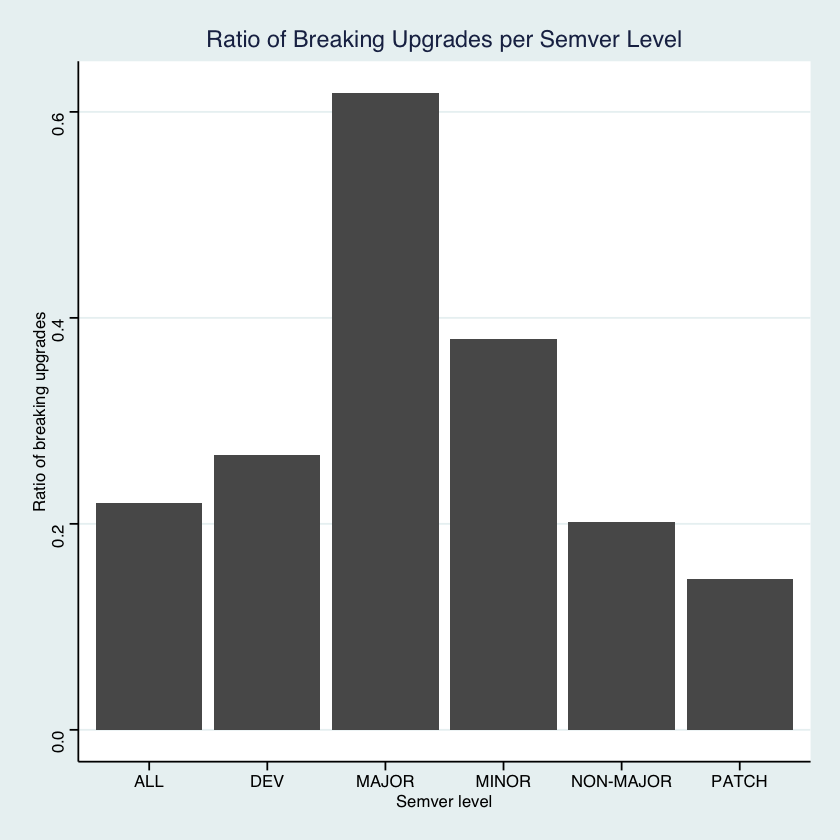

In [20]:
ggplot(breaking_upgrades, aes(x=level, y=broken_ratio)) + 
        labs(title="Ratio of Breaking Upgrades per Semver Level",
             x="Semver level",
             y="Ratio of breaking upgrades") +
        geom_bar(stat="identity")

### Number of Breaking Changes

In [21]:
# Now we are only interested in breaking releases, so filter out the other ones
dt <- subset(deltas, bcs_clean_stable > 0)

In [22]:
summary(dt$bcs_clean_stable)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       7     157      29  164909 

In [23]:
summary(subset(dt, level == "MAJOR")$bcs_clean_stable)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     7.0    28.0   464.1   131.5 60276.0 

In [24]:
summary(subset(dt, level == "MINOR")$bcs_clean_stable)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     1.0      2.0      9.0    205.5     38.0 164909.0 

In [25]:
summary(subset(dt, level == "PATCH")$bcs_clean_stable)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     2.00     5.00    82.88    18.00 50488.00 

In [26]:
summary(subset(dt, level == "DEV")$bcs_clean_stable)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     2.0     8.0   142.9    32.0 29332.0 

Saving 7 x 7 in image



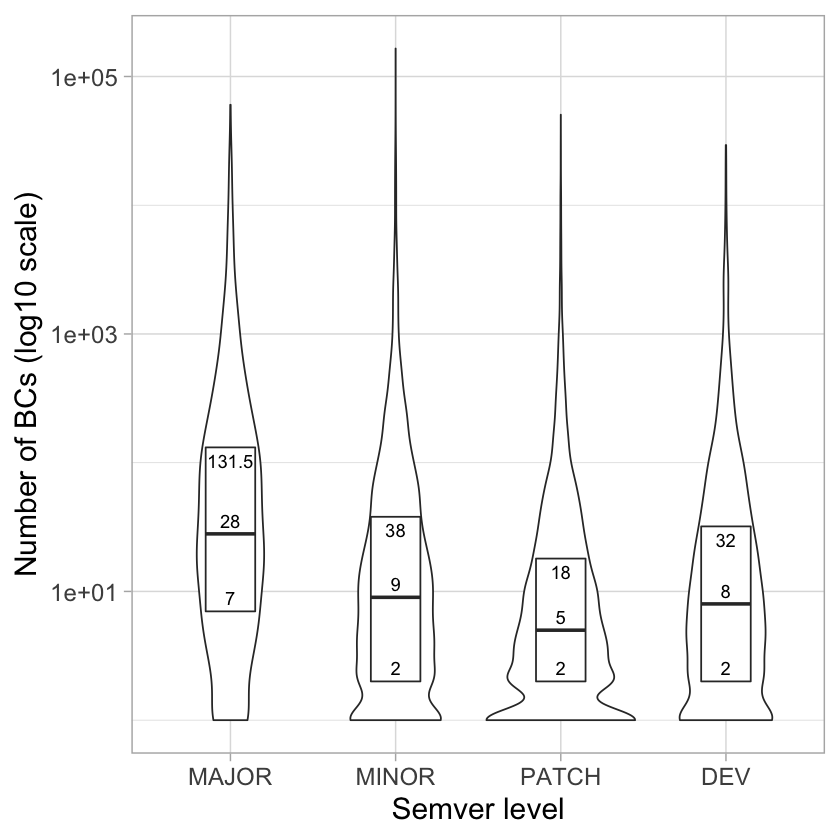

In [27]:
# Compute median value
med_fun <- function(x) {
    return (data.frame(y=median(x), label = round(10^median(x), digits=2)))
}

# Compute value of the first quantile
fstq_fun <- function(x) {
    return (data.frame(y=quantile(x)[2], label = round(10^(quantile(x)[2]), digits=2)))
}

# Compute value of the third quantile
thrq_fun <- function(x) {
    return (data.frame(y=quantile(x)[4], label = round(10^(quantile(x)[4]), digits=2)))
}

# Number of breaking changes per broken release per semantic versioning level
p <- ggplot(dt, aes(x=level, y=bcs_clean_stable)) +
    labs(x="Semver level", y="Number of BCs (log10 scale)") +
    geom_violin() +
    geom_boxplot(width=0.3, outlier.shape = NA, coef=0) +
    stat_summary(fun.data = med_fun, geom = "text", vjust=-0.5) +
    stat_summary(fun.data = fstq_fun, geom = "text", vjust=-0.5) +
    stat_summary(fun.data = thrq_fun, geom = "text", vjust=+1.5) +
    scale_y_continuous(trans='log10') +
    theme_light(base_size=18)

p
ggsave("figures/mdg-bc-number.pdf", p)

### Breaking Change Types

In [28]:
# Exclude BCs that are not considered in the study
# which(colnames(deltas)=="classNowCheckedException") #41
# which(colnames(deltas)=="methodNowThrowsCheckedException") #61
# which(colnames(deltas)=="fieldStaticAndOverridesStatic") #67
# which(colnames(deltas)=="methodAbstractAddedInSuperclass") #63
# which(colnames(deltas)=="methodAbstractAddedInImplementedInterface") #64
# which(colnames(deltas)=="methodLessAccessibleThanInSuperclass") #51
# which(colnames(deltas)=="fieldLessAccessibleThanInSuperclass") #68
# which(colnames(deltas)=="fieldRemovedInSuperclass") #74
# which(colnames(deltas)=="methodRemovedInSuperclass") #49
# which(colnames(deltas)=="superclassModifiedIncompatible") #45
# which(colnames(deltas)=="methodIsStaticAndOverridesNotStatic") #53

# Get dataframe with semver level and BC types
f <- deltas[c(5, 36:40, 42:44, 46:48, 50, 52, 54:59, 62, 65:66, 69:73, 75:78)]

`summarise()` has grouped output by 'level'. You can override using the `.groups` argument.

Saving 7 x 7 in image



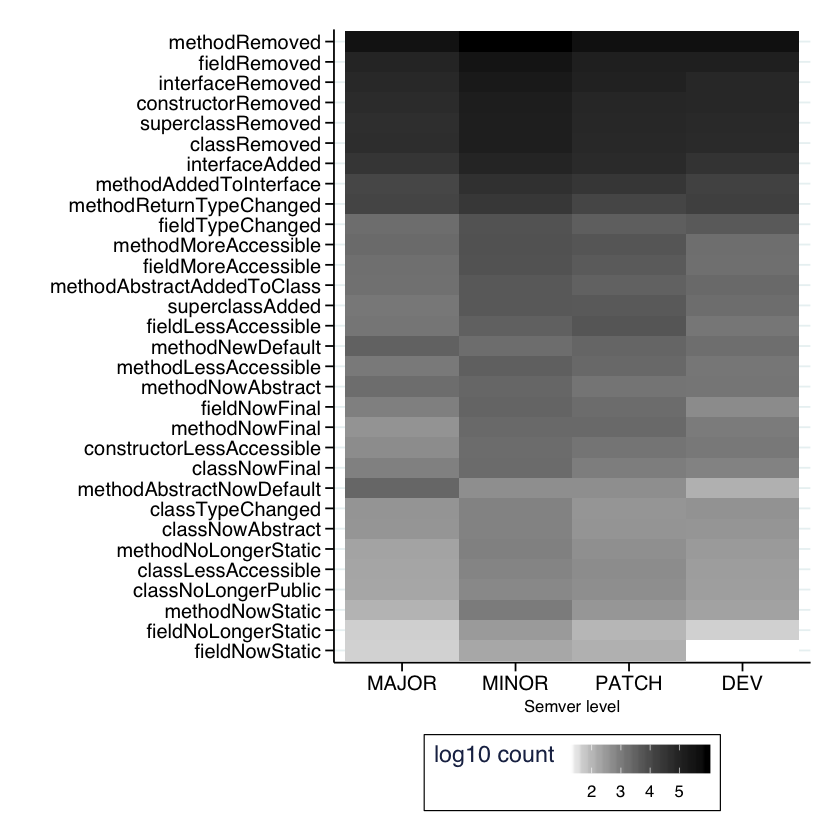

In [29]:
# Heatmap of occurences of breaking changes per semver level
formatted <- gather(f, "kind", "count", 2:32)

aggregated <- formatted %>%
    group_by(level, kind) %>%
    summarise(log_count=log10(sum(count)))

p <- ggplot(aggregated, aes(x=level, y=reorder(kind, log_count), fill=log_count)) +
    labs(x="Semver level", y="", fill="log10 count") +
    geom_tile() +
    scale_fill_gradientn(colours = c("white", "white", "lightgray", "black"), values = c(-Inf, 0, 0.1, 1)) +
    theme(axis.text.y = element_text(angle=0, size=12), axis.text.x = element_text(size=12), 
          legend.text = element_text(size=10), plot.background = element_rect(fill = "white"))

p
ggsave("figures/mdg-heatmap.pdf", p)

`summarise()` has grouped output by 'level'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'level'. You can override using the `.groups` argument.

Saving 7 x 7 in image



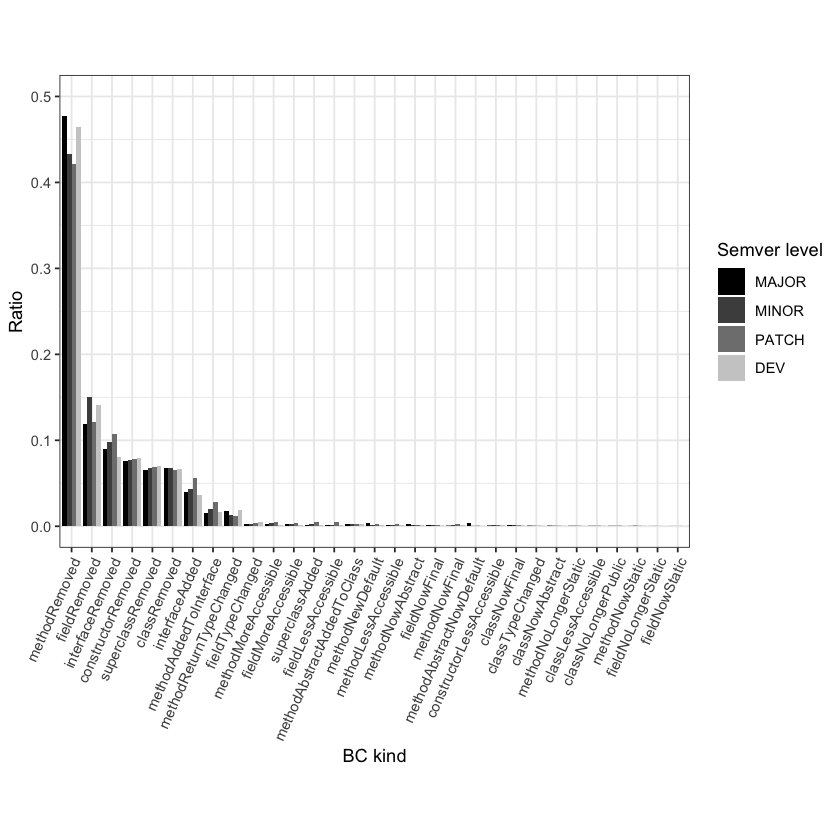

In [30]:
# Histogram with number of breaking changes per semver level
formatted <- gather(f, "kind", "count", 2:32)

aggregated <- formatted %>%
    group_by(level, kind) %>%
    summarise(total=sum(count))

normalized <- aggregated %>%
    group_by(level) %>%
    summarise(kind = kind, ratio = total / sum(total)) %>%
    arrange(across(ratio, desc))

p <- ggplot(normalized, aes(x = reorder(kind,-ratio), y = ratio, fill = level)) + 
    labs(x = "BC kind", y = "Ratio", fill="Semver level") +
    geom_bar(stat = 'identity', position = 'dodge') +
    scale_fill_manual(values = c("grey0","grey30","grey50","grey80")) +
    ylim(0.0, 0.5) +
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 66, vjust = 1, hjust = 1), aspect.ratio=0.75)

p
ggsave("figures/mdg-bc-kind-count.pdf")

---

## EOF

> Lina Ochoa, Thomas Degueule, Jean-Rémy Falleri & Jurgen Vinju. Breaking Bad? Semantic Versioning and Impact of Breaking Changes in Maven Central. Journal of Empirical Software Engineering, 2021.

This notebook—and all its content—is licensed under the [MIT License](https://choosealicense.com/licenses/mit/).   
© 2021 Maracas